In [218]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from collections.abc import Callable

In [219]:
def fitness_function(x1: float, x2: float) -> float:
    return np.sin(x1 * 0.05) + np.sin(x2 * 0.05) + 0.4 * np.sin(x1 * 0.15) * np.sin(x2 * 0.15)

In [220]:
def visualize_iteration(
    current_positions: npt.NDArray[np.float16],
    iteration_idx: int,
    x_min: float = 0,
    x_max: float = 30,
    F: Callable[[float, float], float] = fitness_function,
) -> None:
    x_linspace = np.linspace(x_min, x_max, 100)
    y_linspace = np.linspace(x_min, x_max, 100)
    x_mesh, y_mesh = np.meshgrid(x_linspace, y_linspace)
    z_mesh = F(x_mesh, y_mesh)

    plt.figure(figsize=(8, 6))

    contour = plt.contourf(x_mesh, y_mesh, z_mesh, cmap='viridis', levels=100)
    plt.colorbar(contour)

    plt.scatter(np.array(current_positions)[:, 0], np.array(current_positions)[:, 1], label='Cząsteki', color="red")

    plt.xlim(x_min, x_max)
    plt.ylim(x_min, x_max)
    plt.title(f"Optymalizacja rojem cząstek - Iteracja {iteration_idx + 1}")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()

    plt.savefig(f"step_{iteration_idx + 1}.jpg")

In [221]:
# 1.	Pobierz parametry N (liczba osobników), rinercji (wpływ bezwładu), rglob  (przyciąganie do optimum globalnego), rlok  (przyciąganie do optimum lokalnego), xmin,i , xmax,i (zakresy zmienności każdego z atrybutów), iteracje_liczba (liczba iteracji)
def pso(
        N: int = 4,
        r_inercji: float = 0.2,
        r_glob: float = 0.3,
        r_lok: float = 0.3,
        x_min: float = 0,
        x_max: float = 100,
        F: Callable[[float, float], float] = fitness_function,
        iteracje_liczba: int = 30,
) -> npt.NDArray[np.float16]:
    # 2.	Stworzenie w sposób losowy populacji składającej się z N osobników i skopiowanie tych wartości jako optima lokalne (X(lok)) dla każdego osobnika
    X = np.random.uniform(x_min, x_max, size=(N, 2))
    x_lok = np.copy(X)

    # 3.	Stworzenie tablicy dwuwymiarowej określającej prędkość o rozmiarze N x n (n - liczba atrybutów, N – liczba osobników) o początkowych wartościach równych zero, Vj,i = 0 - to prędkość j-tego osobnika, i-tego atrybutu.
    V = np.zeros(shape=(N, 2))

    history = np.zeros((iteracje_liczba, N, 2), dtype=np.float16)

    # 4.	Wykonaj algorytm w pętli przez iteracje_liczba razy.
    for iteration in range(iteracje_liczba):
        history[iteration] = X.copy()

        # 4.1.	Oceń wszystkie osobniki (za pomocą funkcji F()).
        scores = np.array([F(*p) for p in X])
        # 4.2.	Niech xglob = osobnik z najlepszą oceną.
        x_glob = X[np.argmax(scores)].copy()

        # 4.3.	Wykonaj pętlę po wszystkich osobnikach, niech j to identyfikator osobnika.
        for j in range(N):
            # 4.3.1.	Jeśli ocena x(lok)j jest gorsza niż ocena xj wtedy x(lok)j  := xj .
            if F(*x_lok[j]) < scores[j]:
                x_lok[j] = X[j].copy()

        # 4.4.	Wykonaj pętlę po wszystkich osobnikach, niech j to identyfikator osobnika.
        for j in range(N):
            # 4.4.1.	Wylosuj wartości rndglob, rndlok z przedziału (0;1).
            rnd_glob = np.random.rand()
            rnd_lok = np.random.rand()

            # 4.4.2.	Wykonaj pętle po wszystkich atrybutach, niech i to identyfikator atrybutu.
            for i in range(2):
                # 4.4.2.1.	Wylicz nową prędkość dla każdego i
                # Vj,i := Vj,i *rinercji + (xglob,i – xj,i)*rglob*rndglob + (x(lok)j,i – xj,i)*rlok*rndlok .
                V[j, i] = (
                    V[j, i] * r_inercji
                    + (x_glob[i] - X[j, i]) * r_glob * rnd_glob
                    + (x_lok[j, i] - X[j, i]) * r_lok * rnd_lok
                )
                # 4.4.2.2.	Zastosuj wyznaczoną prędkość Xj,i := Xj,i + Vj,i .
                X[j, i] += V[j, i]

    return history

In [222]:
history = pso()

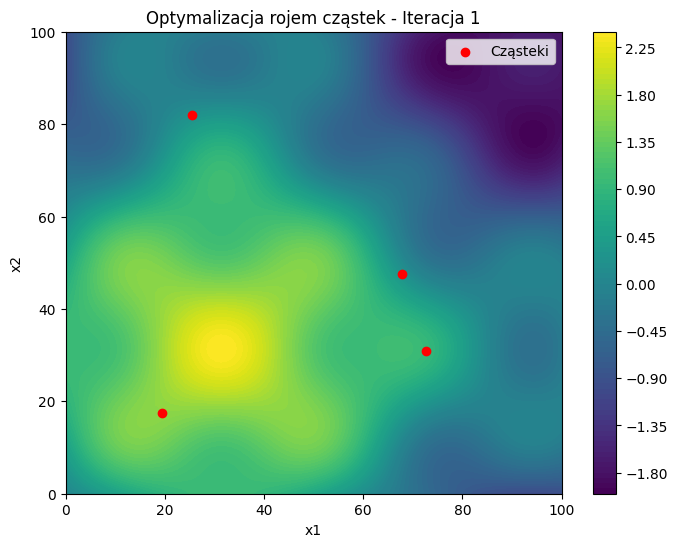

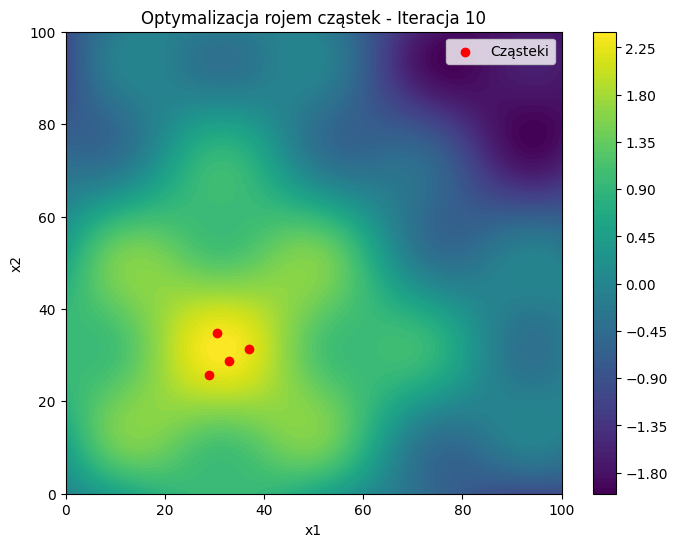

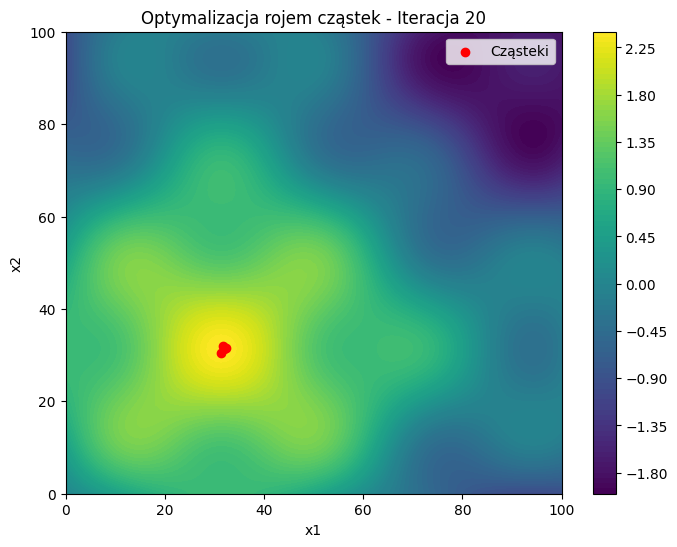

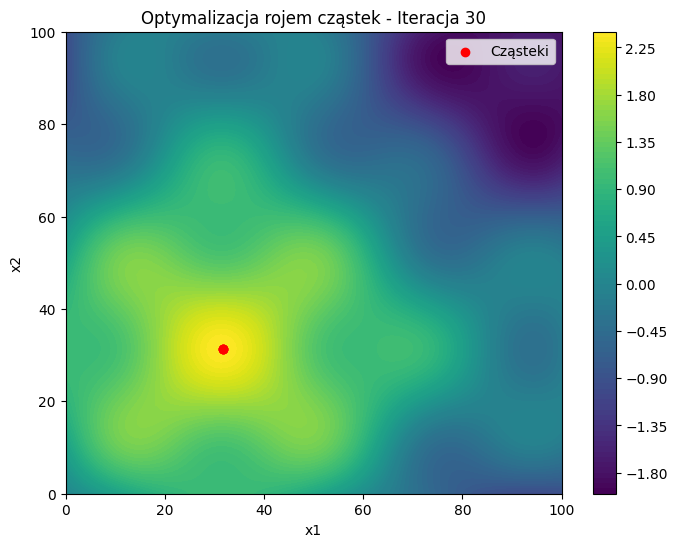

In [223]:
iterations_id = np.array([0, 9, 19, 29])
h = history[iterations_id]
for i, positions_in_step in zip(iterations_id, history[iterations_id]):
    visualize_iteration(
        current_positions=positions_in_step,
        iteration_idx=i,
        x_min=0,
        x_max=100,
        F=fitness_function,
    )